In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

#from sklearn import OneHotEncoder

# per importare cose nella folder precedente da ora in poi
import sys
sys.path.append('../')

from layer import HiddenLayer
from activations import *
from losses import *
from network import Network
from regularizers import *
from utils import *
from metrics import *
from validation import *
from gridsearch import grid_search

random.seed(42)
np.random.seed(42)

# Progress bar
from tqdm import tqdm
import time

In [2]:
X_train, y_train, test = read_cup("../data/ML-CUP23-TR.csv", "../data/ML-CUP23-TS.csv")

In [3]:
from sklearn.preprocessing import MinMaxScaler
rescaler = MinMaxScaler()
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])
rescaler.fit(y_train)
y_train = rescaler.transform(y_train)
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)

In [34]:
seed = 3
np.random.seed(seed)
net = Network(MSE(1), eta=1e-3)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=16,
    starting=Range_random(),
    regularizer=None,
    activation=ReLU(),
)

net.add_layer(
    input_size=16,
    units_size=16,
    starting=Range_random(),
    regularizer=None,
    activation=ReLU(),
)

net.add_layer(
    input_size=16,
    units_size=3,
    starting=Range_random(),
    regularizer=None,
    activation=Identity(),
)

In [35]:
X_split = np.array_split(X_train, 5)
y_split = np.array_split(y_train, 5)

X_train = np.concatenate(X_split[:4] + (X_split[4 + 1:]))
y_train = np.concatenate(y_split[:4] + (y_split[4 + 1:]))

X_val = X_split[4]
y_val = y_split[4]

Epochs: 100%|██████████| 10000/10000 [23:09<00:00,  7.20it/s] 


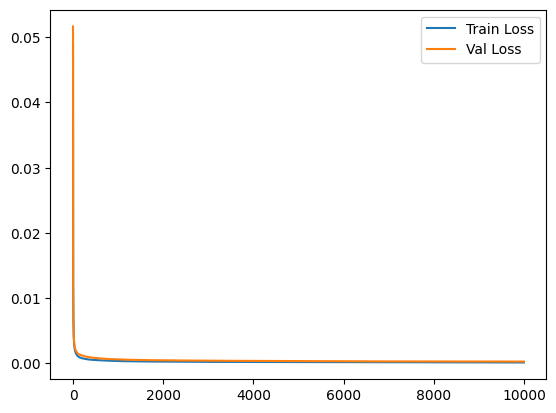

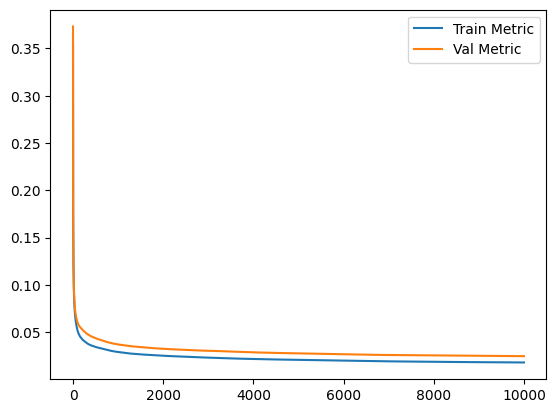

In [36]:
info = net.train(
    X_train, 
    y_train,
    X_val,
    y_val,
    10000,
    100,
    MEE()
)
plt.plot(info['tr_losses'], label='Train Loss')
plt.plot(info['val_losses'], label='Val Loss')
plt.legend()
plt.show()

plt.plot(info['tr_metrics'], label='Train Metric')
plt.plot(info['val_metrics'], label='Val Metric')
plt.legend()
plt.show()

In [37]:
print(net.statistics(X_train, y_train, MEE()))

(0.00014910675651748606, 0.018159511974419236)


In [ ]:
statistics = kfold_crossval(
    X=X_train,
    y=y_train,
    k=6,
    net=net,
    epochs=2500,
    patience=100,
    seed=seed,
    metric=MEE()
)

print(statistics)

Combination: [32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 1e-06 ('Standard', 0.9) 0.01


Epochs:  38%|███▊      | 3771/10000 [01:56<03:12, 32.42it/s]


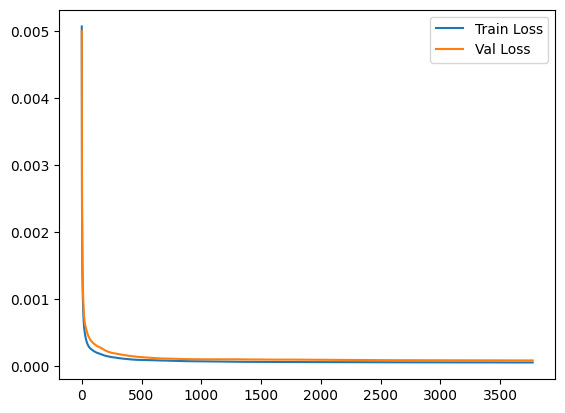

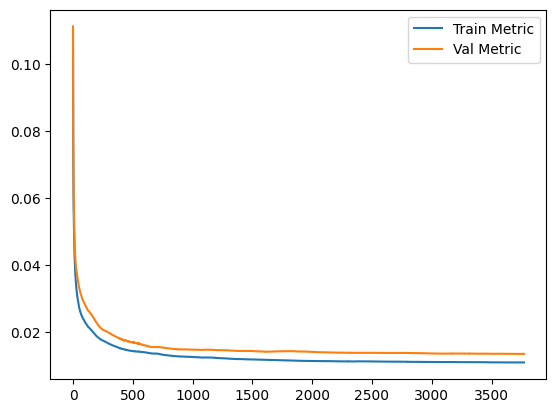

Fold 1 of 6 completed
Train Loss: 5.4252952371496676e-05
Train Metric: 0.011059953778977387
Val Loss: 8.444266505066175e-05
Val Metric: 0.013606440207170037


Epochs:  22%|██▏       | 2153/10000 [01:06<04:02, 32.31it/s]


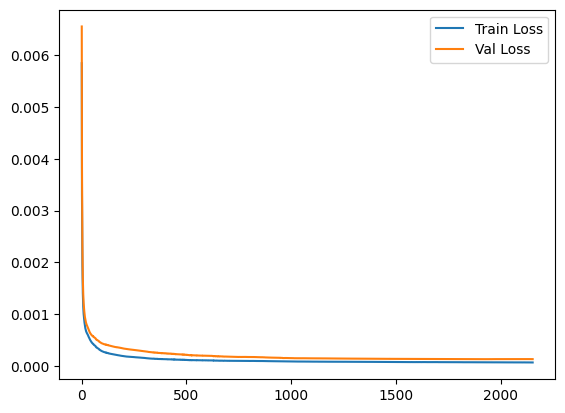

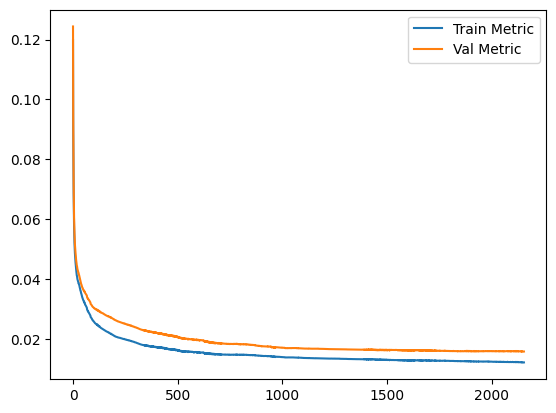

Fold 2 of 6 completed
Train Loss: 6.731578757393119e-05
Train Metric: 0.012590182033983703
Val Loss: 0.00012733900840499853
Val Metric: 0.01597918722734736


Epochs:  37%|███▋      | 3668/10000 [01:52<03:14, 32.47it/s]


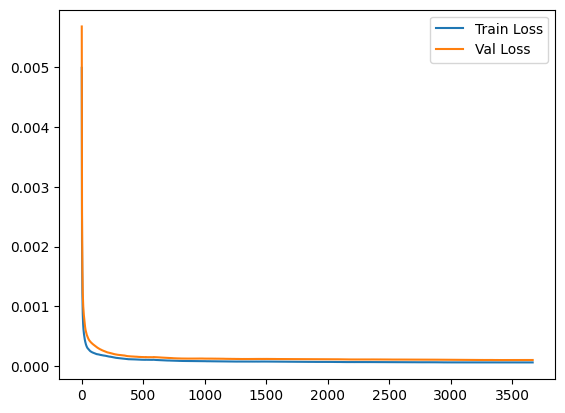

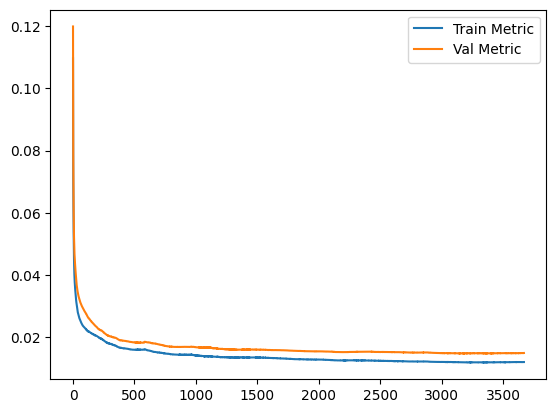

Fold 3 of 6 completed
Train Loss: 6.208006794564228e-05
Train Metric: 0.011995399939821754
Val Loss: 0.00010197112225407815
Val Metric: 0.014877486010553472


Epochs:  41%|████      | 4051/10000 [02:04<03:03, 32.50it/s]


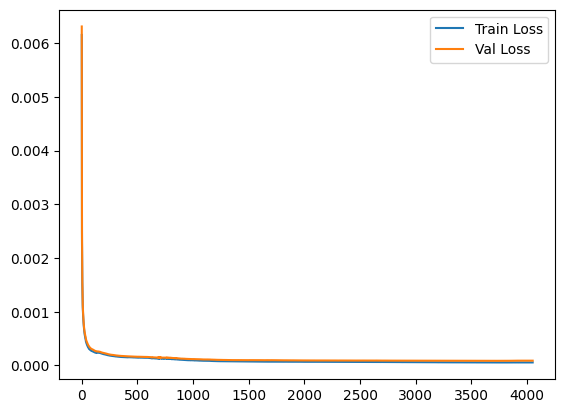

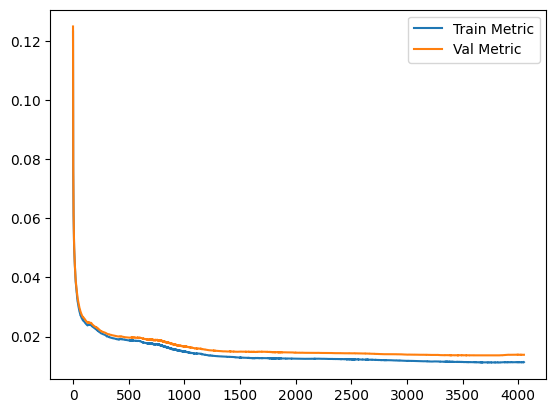

Fold 4 of 6 completed
Train Loss: 5.4900836210082975e-05
Train Metric: 0.011275293646108736
Val Loss: 8.52198987332658e-05
Val Metric: 0.01361911639028005


Epochs:  22%|██▏       | 2211/10000 [01:07<03:59, 32.58it/s]


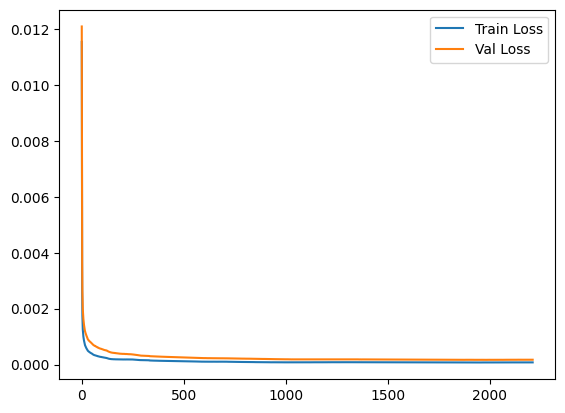

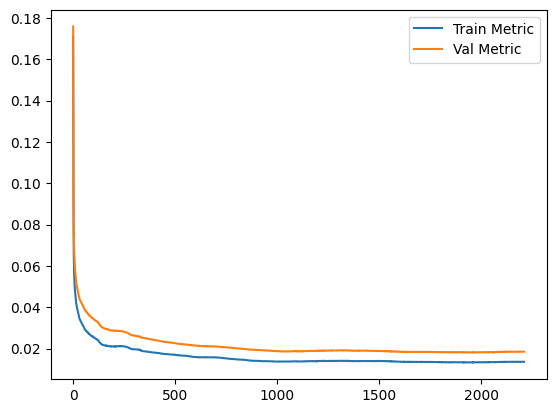

Fold 5 of 6 completed
Train Loss: 7.420302465078511e-05
Train Metric: 0.013260794505505179
Val Loss: 0.00016795152230316906
Val Metric: 0.018082949819992717


Epochs:  12%|█▏        | 1158/10000 [00:35<04:33, 32.28it/s]


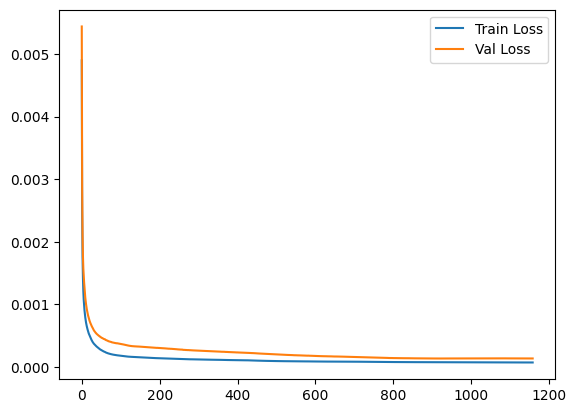

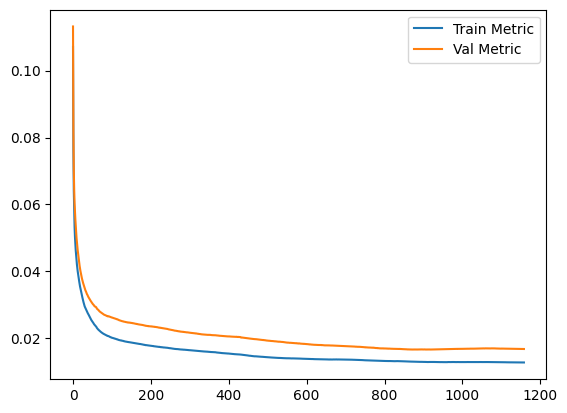

Fold 6 of 6 completed
Train Loss: 7.29021247617109e-05
Train Metric: 0.01291639607264871
Val Loss: 0.00013365374933485164
Val Metric: 0.0166427845056538
Statistics: {'tr_loss': 6.427579891894152e-05, 'tr_metric': 0.012183003329507577, 'val_loss': 0.00011676299434683748, 'val_metric': 0.015467994026832908}




Combination: [32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 1e-06 ('Standard', 0.9) 0.0001


Epochs:   8%|▊         | 809/10000 [00:24<04:43, 32.41it/s]


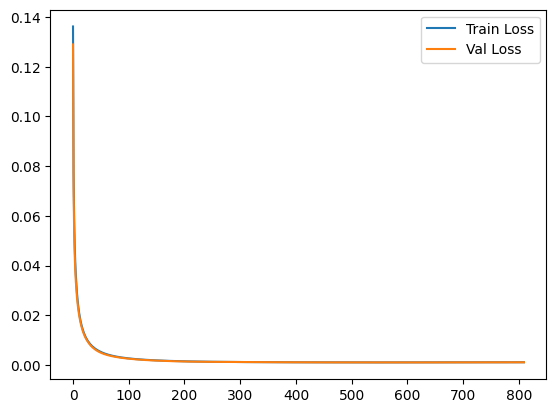

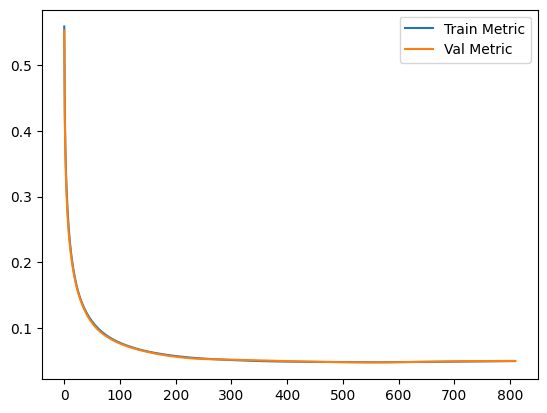

Fold 1 of 6 completed
Train Loss: 0.0010560044586353883
Train Metric: 0.04836218734671047
Val Loss: 0.001027342924585398
Val Metric: 0.048041214882462484


Epochs:   8%|▊         | 817/10000 [00:25<04:42, 32.45it/s]


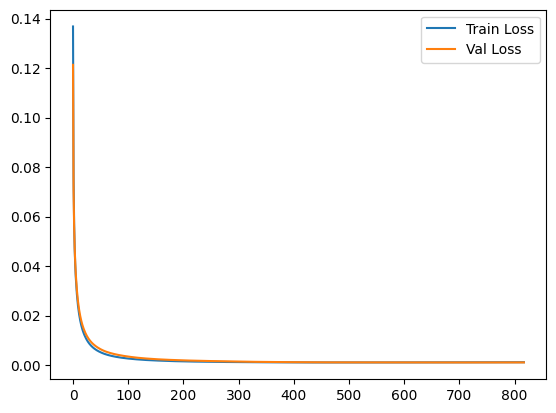

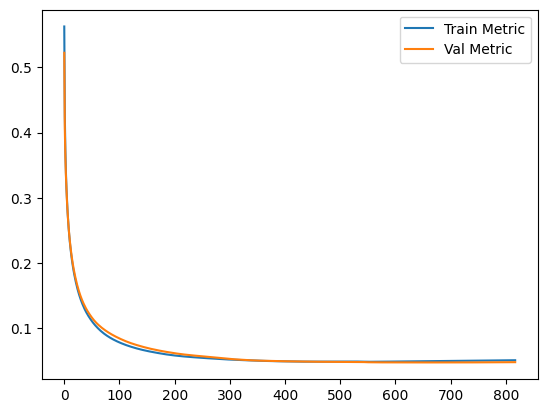

Fold 2 of 6 completed
Train Loss: 0.0010370127535091706
Train Metric: 0.048358885415834794
Val Loss: 0.0010207949081741893
Val Metric: 0.04738711571243719


Epochs:   7%|▋         | 710/10000 [00:21<04:45, 32.50it/s]


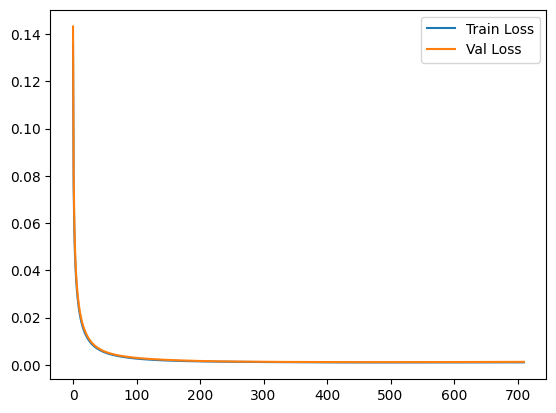

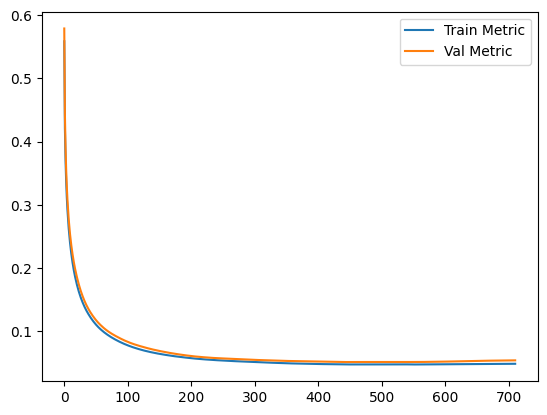

Fold 3 of 6 completed
Train Loss: 0.0010027326897597592
Train Metric: 0.04749157423150273
Val Loss: 0.001149563819741309
Val Metric: 0.05135146792031745


Epochs:   9%|▉         | 910/10000 [00:28<04:40, 32.41it/s]


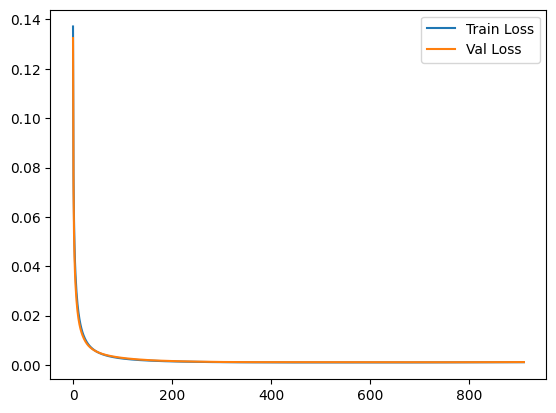

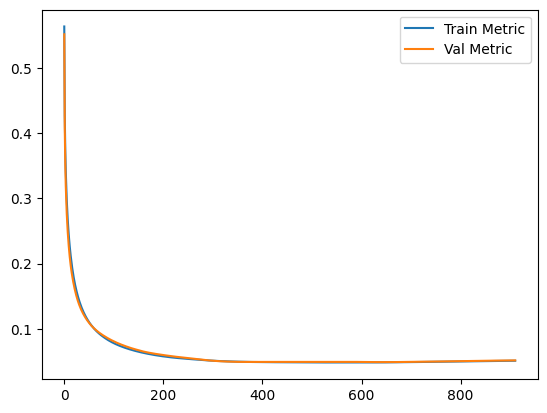

Fold 4 of 6 completed
Train Loss: 0.0010371762087895663
Train Metric: 0.04856996605303639
Val Loss: 0.0010923101151059577
Val Metric: 0.04892424059001282


Epochs:   9%|▉         | 923/10000 [00:28<04:41, 32.22it/s]


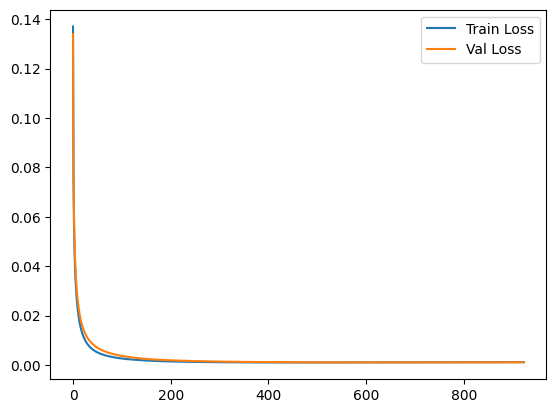

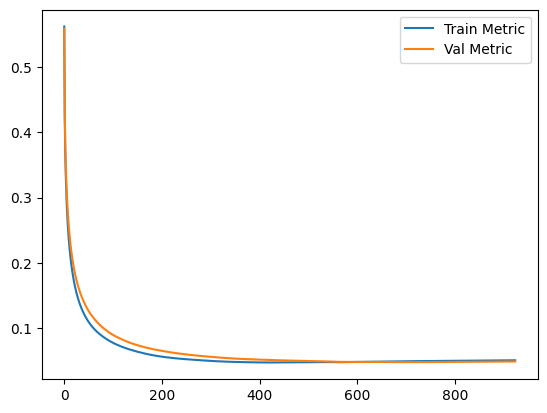

Fold 5 of 6 completed
Train Loss: 0.0010653394310160972
Train Metric: 0.049098887883314096
Val Loss: 0.0010304697674189398
Val Metric: 0.04807827171472784


Epochs:   7%|▋         | 655/10000 [00:20<04:49, 32.25it/s]


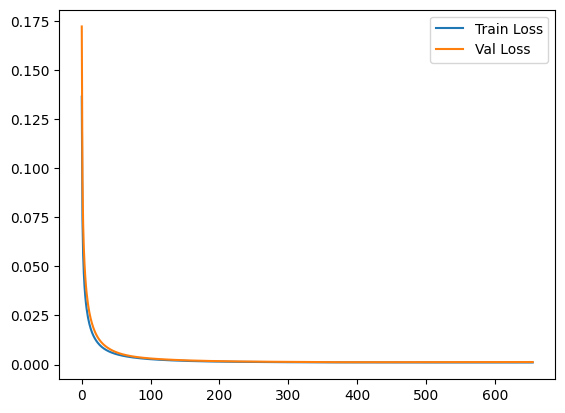

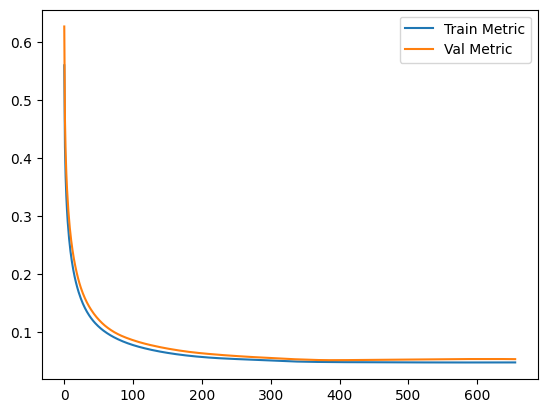

Fold 6 of 6 completed
Train Loss: 0.001079843588946026
Train Metric: 0.048848372395515774
Val Loss: 0.0011865579073864379
Val Metric: 0.052334333838803024
Statistics: {'tr_loss': 0.0010463515217760011, 'tr_metric': 0.04845497888765238, 'val_loss': 0.001084506573735372, 'val_metric': 0.04935277410979347}




Combination: [32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 1e-06 ('Nesterov', 0.9) 0.01


Epochs:  21%|██        | 2056/10000 [01:09<04:30, 29.37it/s]


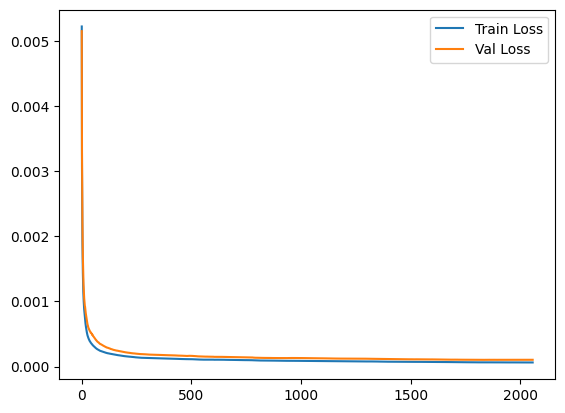

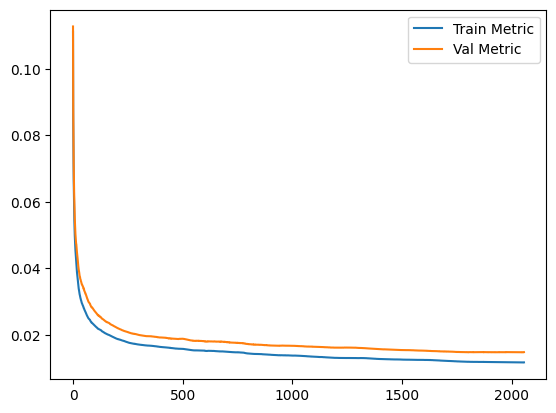

Fold 1 of 6 completed
Train Loss: 6.432551092782136e-05
Train Metric: 0.011865003612453927
Val Loss: 0.00010240034260469304
Val Metric: 0.014755583142915958


Epochs:  30%|██▉       | 2950/10000 [01:39<03:57, 29.66it/s]


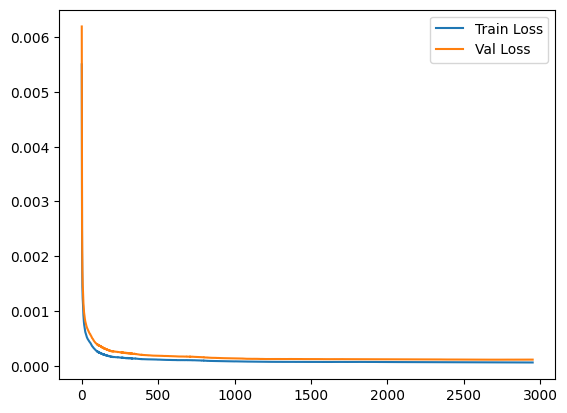

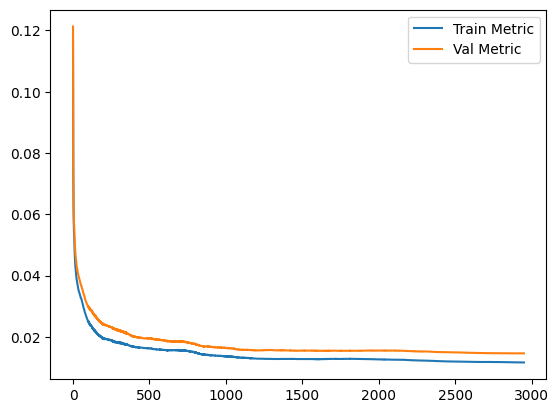

Fold 2 of 6 completed
Train Loss: 6.265997259497054e-05
Train Metric: 0.011832879099129572
Val Loss: 0.0001121049520600472
Val Metric: 0.014705833986732105


Epochs:  28%|██▊       | 2817/10000 [01:35<04:02, 29.64it/s]


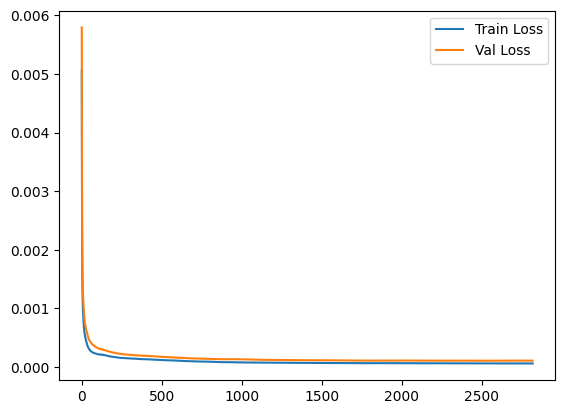

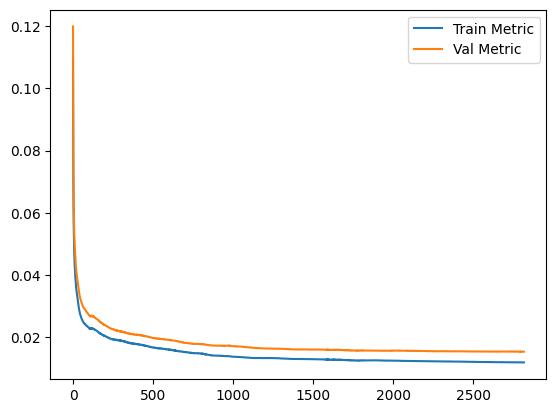

Fold 3 of 6 completed
Train Loss: 6.267028309875793e-05
Train Metric: 0.01205297809278347
Val Loss: 0.00010868030876307107
Val Metric: 0.015401763046133604


Epochs:  12%|█▏        | 1201/10000 [00:40<04:56, 29.69it/s]


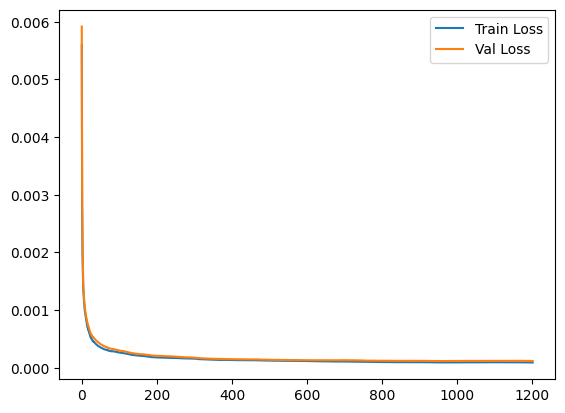

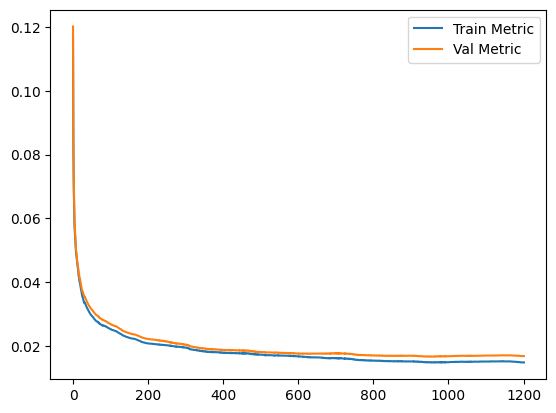

Fold 4 of 6 completed
Train Loss: 9.15459992417202e-05
Train Metric: 0.014926691964493491
Val Loss: 0.00011508281775009445
Val Metric: 0.01671713068455592


Epochs:  24%|██▍       | 2393/10000 [01:20<04:17, 29.55it/s]


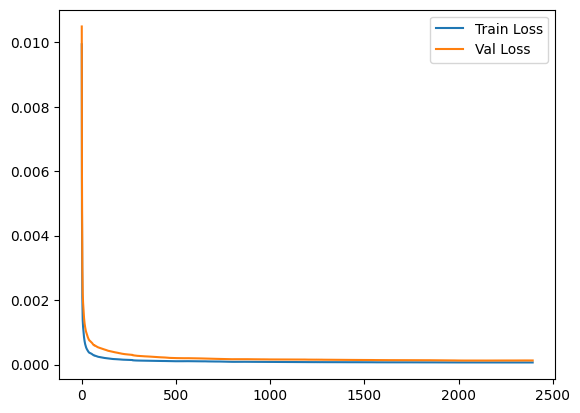

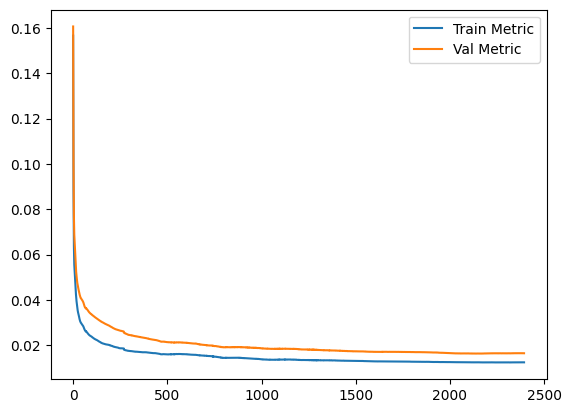

Fold 5 of 6 completed
Train Loss: 6.564004437309813e-05
Train Metric: 0.012439785873693338
Val Loss: 0.00012461924669008353
Val Metric: 0.01630723855820284


Epochs:  19%|█▊        | 1851/10000 [01:02<04:34, 29.65it/s]


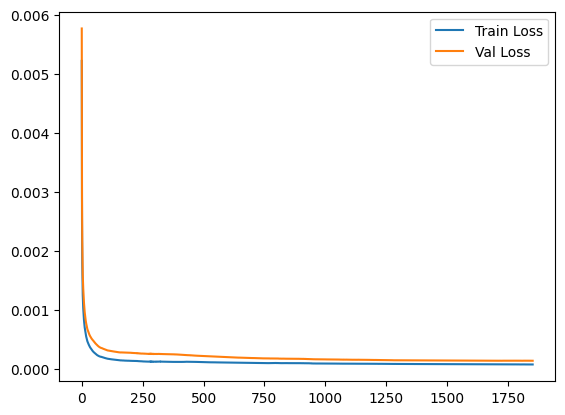

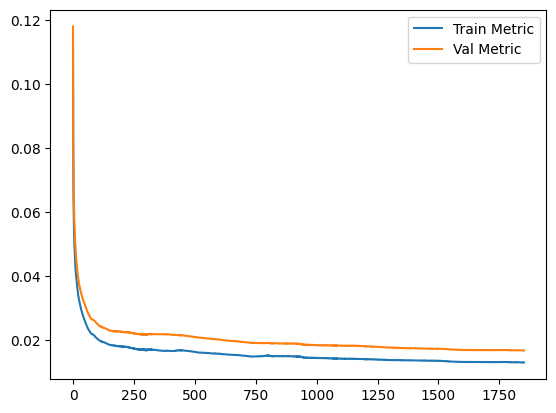

Fold 6 of 6 completed
Train Loss: 7.220990466026043e-05
Train Metric: 0.013033455907489782
Val Loss: 0.0001326844948506234
Val Metric: 0.016763391688389705
Statistics: {'tr_loss': 6.984195248277143e-05, 'tr_metric': 0.012691799091673929, 'val_loss': 0.00011592869378643544, 'val_metric': 0.015775156851155023}




Combination: [32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 1e-06 ('Nesterov', 0.9) 0.0001


Epochs:   8%|▊         | 810/10000 [00:27<05:09, 29.67it/s]


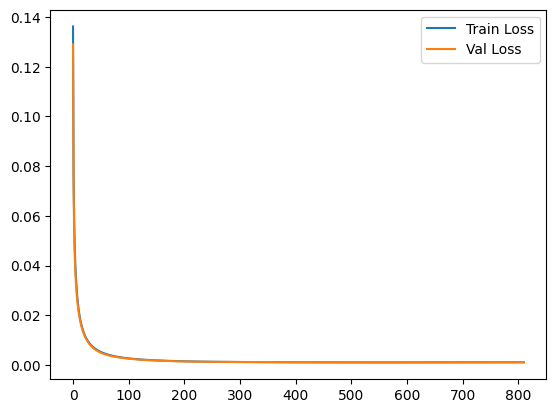

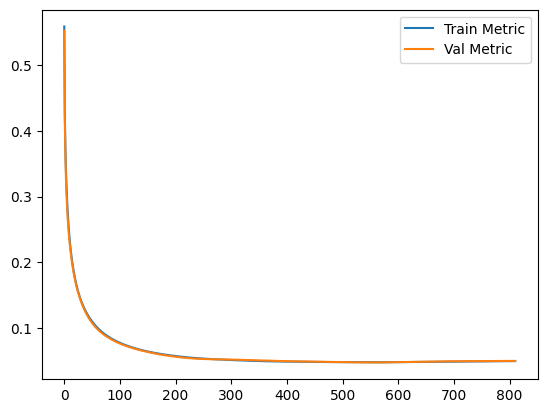

Fold 1 of 6 completed
Train Loss: 0.0010561113305588062
Train Metric: 0.04836609043546347
Val Loss: 0.0010274492082756842
Val Metric: 0.04804903752181704


Epochs:   8%|▊         | 816/10000 [00:27<05:09, 29.63it/s]


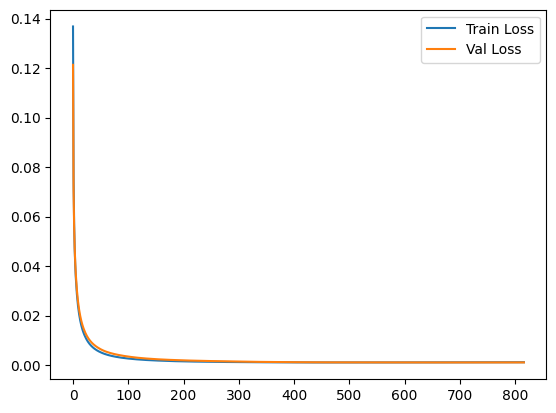

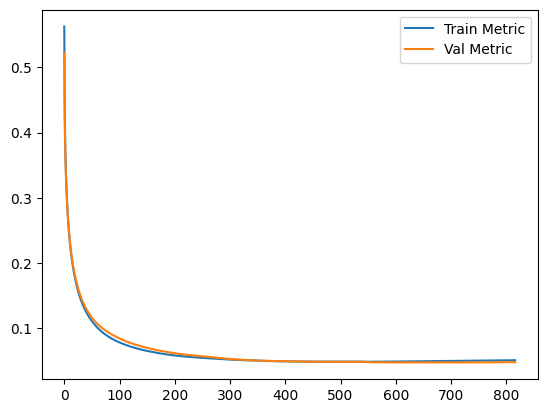

Fold 2 of 6 completed
Train Loss: 0.0010365888397607039
Train Metric: 0.04834973359317219
Val Loss: 0.0010207814480522744
Val Metric: 0.047392796065921367


Epochs:   7%|▋         | 704/10000 [00:23<05:13, 29.66it/s]


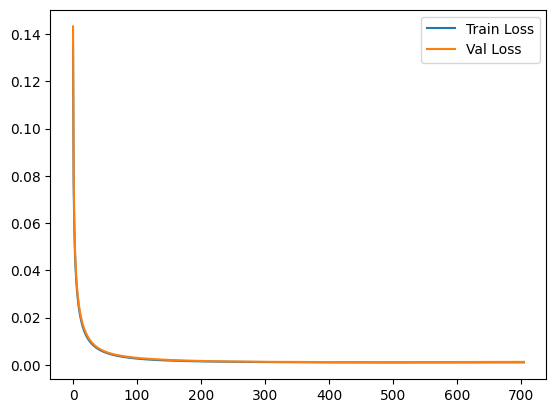

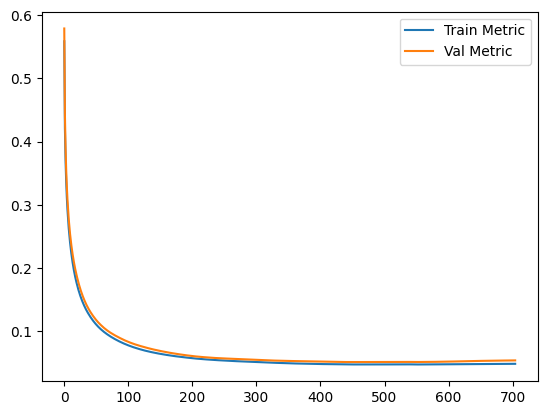

Fold 3 of 6 completed
Train Loss: 0.001003876142562957
Train Metric: 0.0474959338107932
Val Loss: 0.0011495775713667095
Val Metric: 0.05133708927320802


Epochs:   9%|▉         | 910/10000 [00:30<05:07, 29.53it/s]


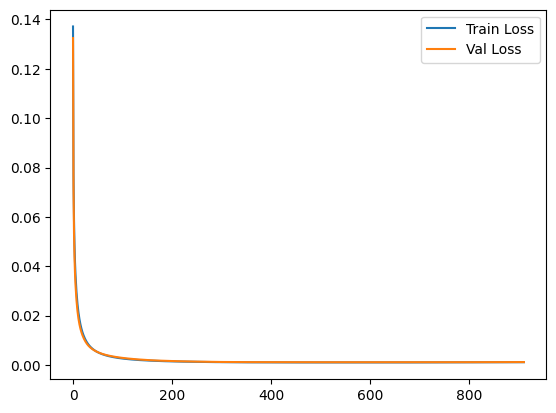

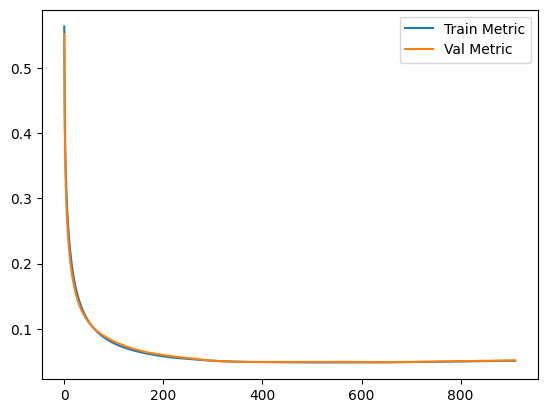

Fold 4 of 6 completed
Train Loss: 0.001037201906795207
Train Metric: 0.04857057405202249
Val Loss: 0.0010923310422749557
Val Metric: 0.04892464261869714


Epochs:   9%|▉         | 925/10000 [00:31<05:07, 29.49it/s]


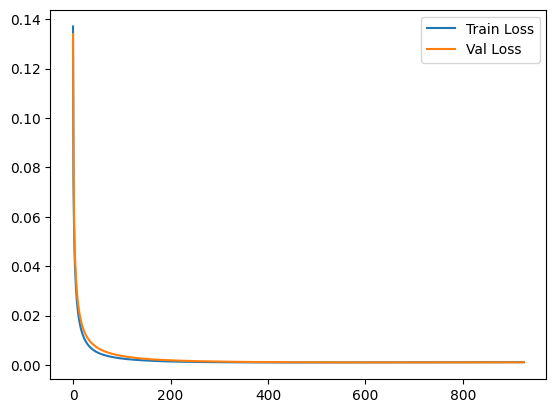

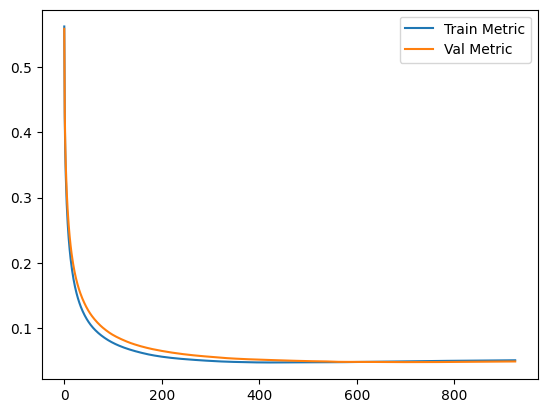

Fold 5 of 6 completed
Train Loss: 0.0010660891444984467
Train Metric: 0.04911967372473935
Val Loss: 0.0010306376293483415
Val Metric: 0.04808071227262854


Epochs:   7%|▋         | 655/10000 [00:22<05:19, 29.28it/s]


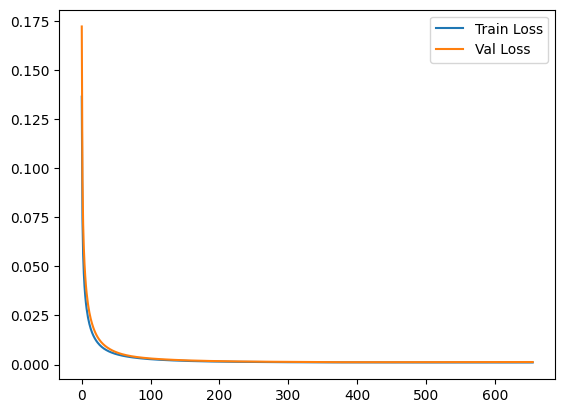

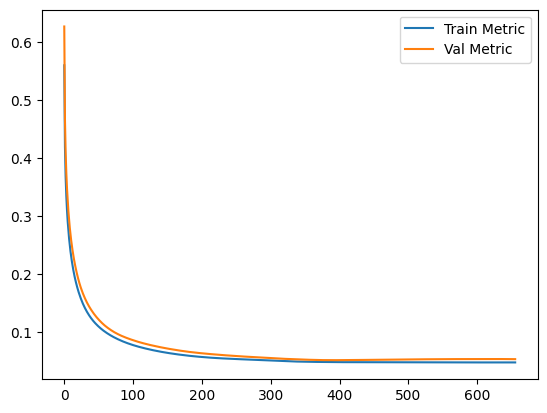

Fold 6 of 6 completed
Train Loss: 0.0010799172726772318
Train Metric: 0.04885081648141452
Val Loss: 0.0011865836420093048
Val Metric: 0.052335707106234745
Statistics: {'tr_loss': 0.001046630772808892, 'tr_metric': 0.048458803682934204, 'val_loss': 0.0010845600902212118, 'val_metric': 0.04935333080975115}




Combination: [32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 0.0001 ('Standard', 0.9) 0.01


Epochs:   3%|▎         | 257/10000 [00:07<05:00, 32.47it/s]


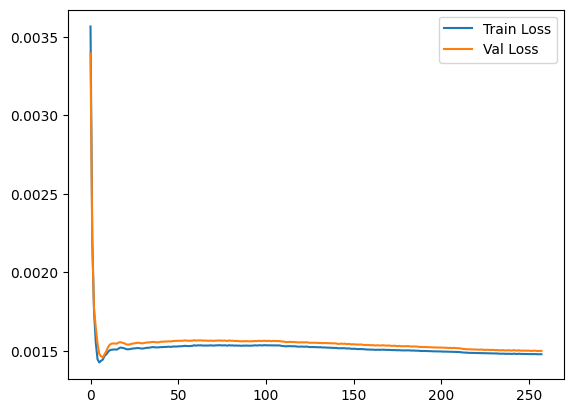

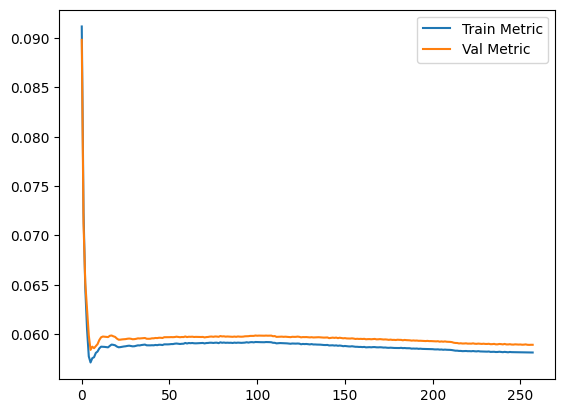

Fold 1 of 6 completed
Train Loss: 0.0014446711235883663
Train Metric: 0.057654980865892734
Val Loss: 0.0014592272802579967
Val Metric: 0.05857053641881473


Epochs:  46%|████▌     | 4567/10000 [02:20<02:47, 32.44it/s]


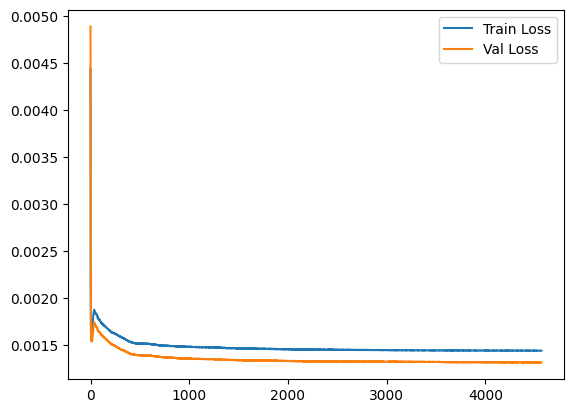

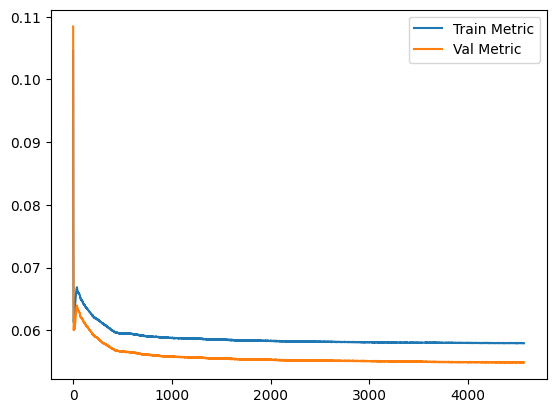

Fold 2 of 6 completed
Train Loss: 0.0014355376227769066
Train Metric: 0.05795548850599116
Val Loss: 0.001310267220006415
Val Metric: 0.05488553991765212


Epochs:   3%|▎         | 257/10000 [00:07<05:02, 32.23it/s]


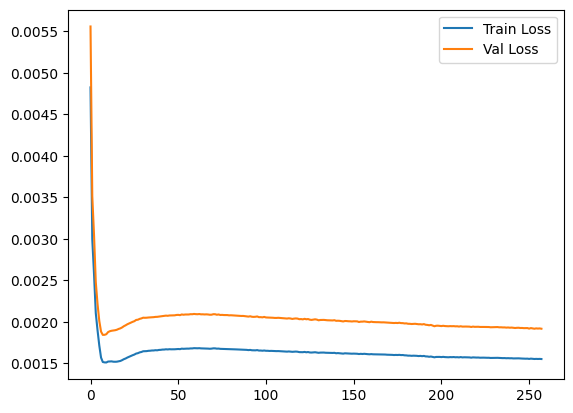

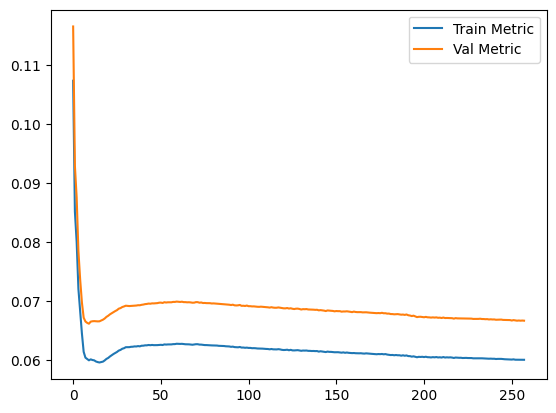

Fold 3 of 6 completed
Train Loss: 0.001514842970309524
Train Metric: 0.06040989117151133
Val Loss: 0.0018414643150754624
Val Metric: 0.06654233364253725


Epochs:  58%|█████▊    | 5765/10000 [02:58<02:10, 32.34it/s]


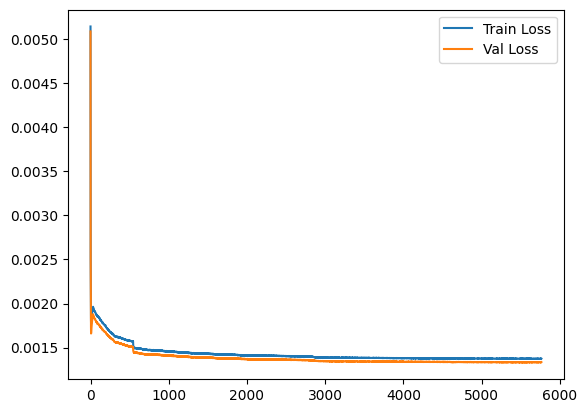

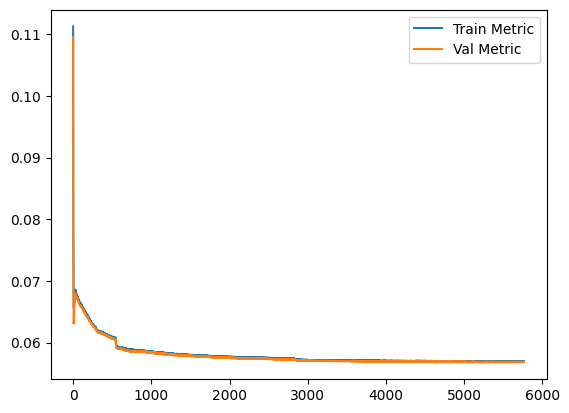

Fold 4 of 6 completed
Train Loss: 0.0013715710502028064
Train Metric: 0.05687500577389201
Val Loss: 0.0013314489483506311
Val Metric: 0.05677241795425856


Epochs:  52%|█████▏    | 5217/10000 [02:41<02:28, 32.30it/s]


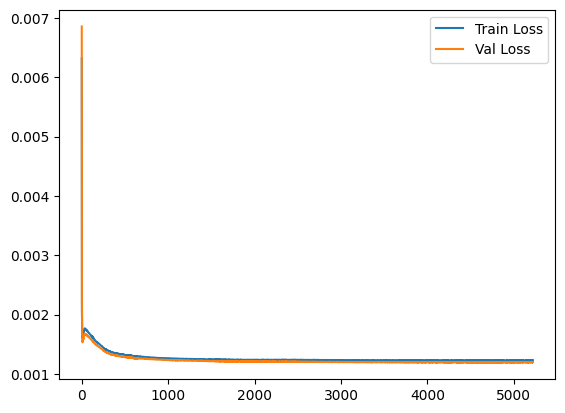

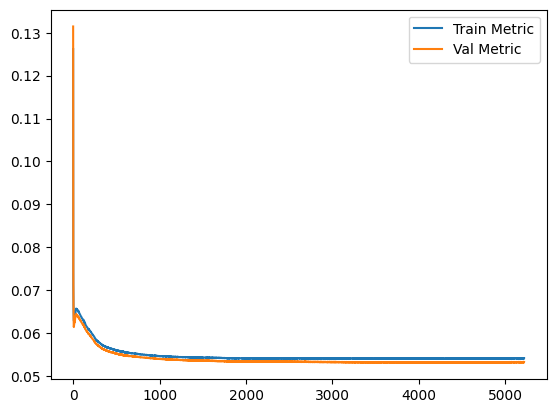

Fold 5 of 6 completed
Train Loss: 0.0012258097220646134
Train Metric: 0.05401374037999759
Val Loss: 0.0011919006791960066
Val Metric: 0.05311012855853602


Epochs:   3%|▎         | 252/10000 [00:07<05:02, 32.26it/s]


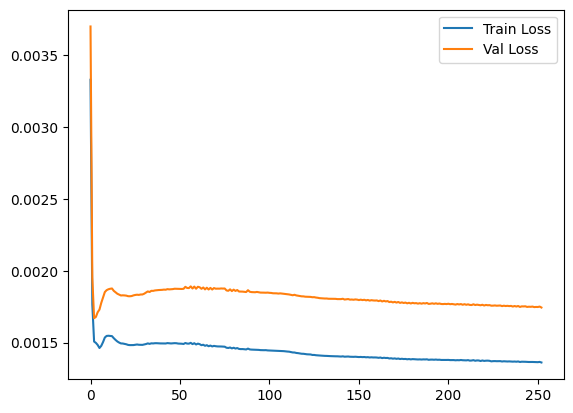

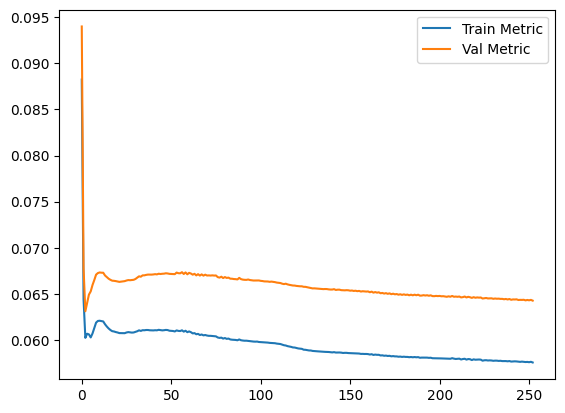

Fold 6 of 6 completed
Train Loss: 0.0015071506428675813
Train Metric: 0.06022427601055921
Val Loss: 0.0016699014183910366
Val Metric: 0.06311109107911803
Statistics: {'tr_loss': 0.0014165971886349665, 'tr_metric': 0.057855563784640664, 'val_loss': 0.0014673683102129247, 'val_metric': 0.05883200792848612}




Combination: [32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 0.0001 ('Standard', 0.9) 0.0001


Epochs:   3%|▎         | 252/10000 [00:07<05:02, 32.18it/s]


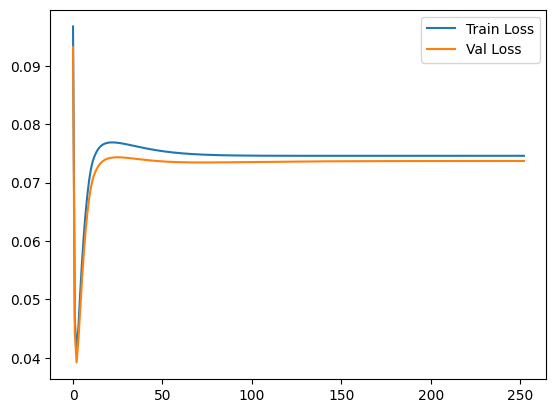

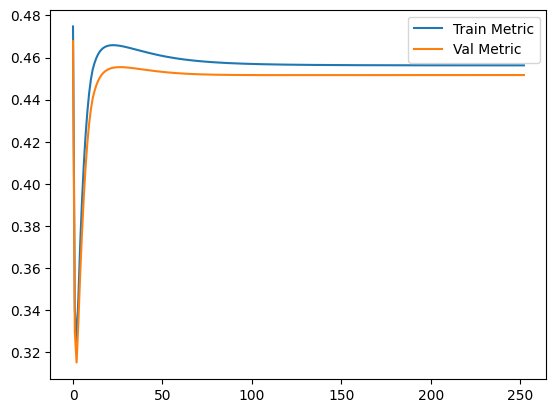

Fold 1 of 6 completed
Train Loss: 0.041047450638286284
Train Metric: 0.3252717841571443
Val Loss: 0.039195930238953035
Val Metric: 0.31505481143481107


Epochs:   3%|▎         | 252/10000 [00:07<05:01, 32.29it/s]


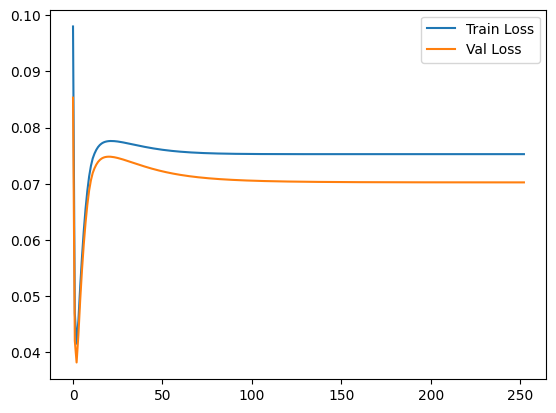

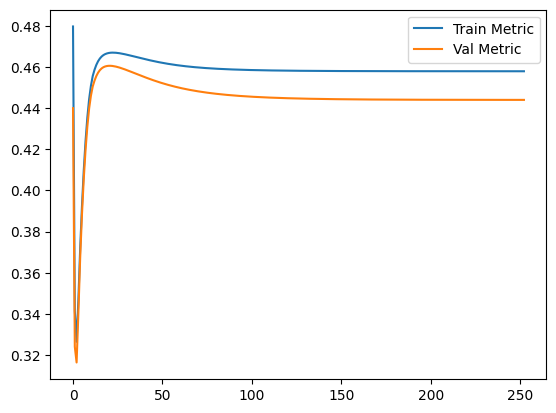

Fold 2 of 6 completed
Train Loss: 0.041484441023397704
Train Metric: 0.326391383457393
Val Loss: 0.038142050242134184
Val Metric: 0.31632001884110056


Epochs:   3%|▎         | 252/10000 [00:07<05:02, 32.20it/s]


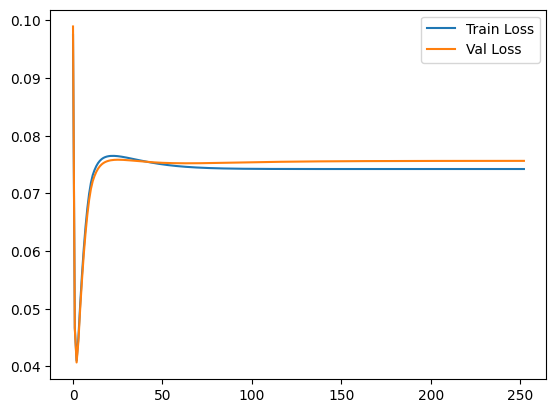

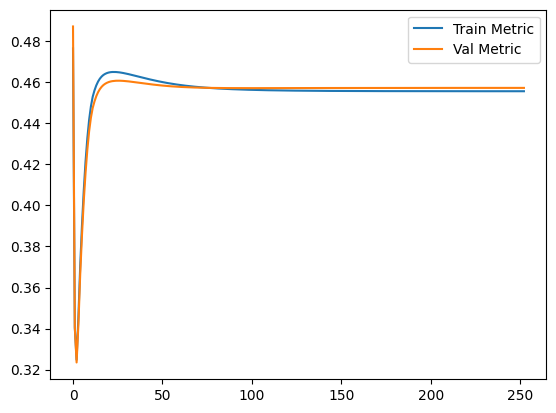

Fold 3 of 6 completed
Train Loss: 0.04097027650460184
Train Metric: 0.3248193118609656
Val Loss: 0.04066737758046265
Val Metric: 0.32350197640465933


Epochs:   3%|▎         | 252/10000 [00:07<05:05, 31.95it/s]


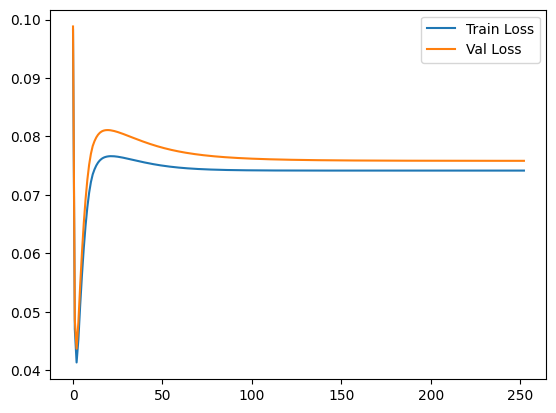

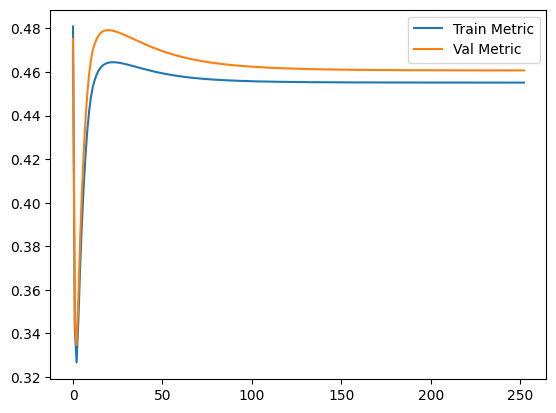

Fold 4 of 6 completed
Train Loss: 0.041343525987036826
Train Metric: 0.32664866734050196
Val Loss: 0.04370570830010776
Val Metric: 0.33462690815461854


Epochs:   3%|▎         | 252/10000 [00:07<05:03, 32.12it/s]


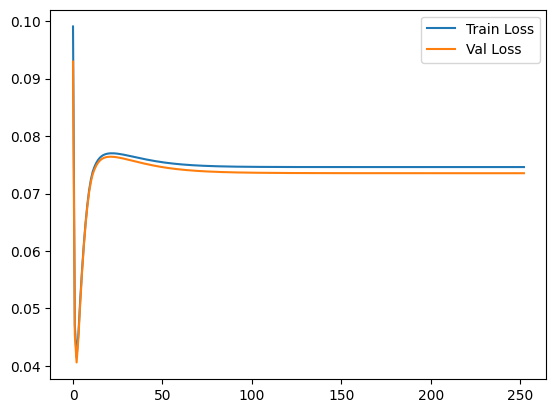

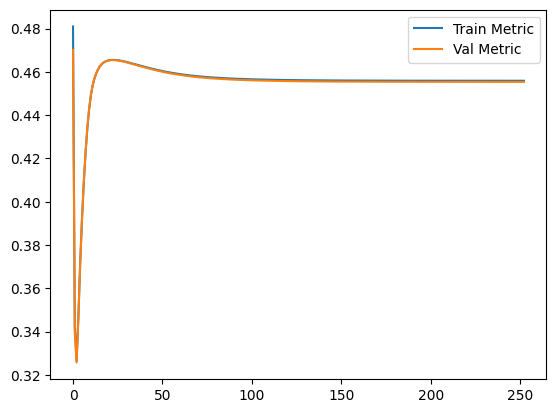

Fold 5 of 6 completed
Train Loss: 0.04147175655401795
Train Metric: 0.326502310394632
Val Loss: 0.0405966059774146
Val Metric: 0.32570433471187527


Epochs:   3%|▎         | 252/10000 [00:07<05:04, 32.06it/s]


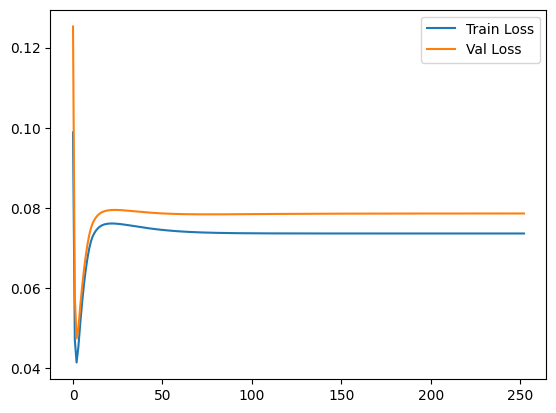

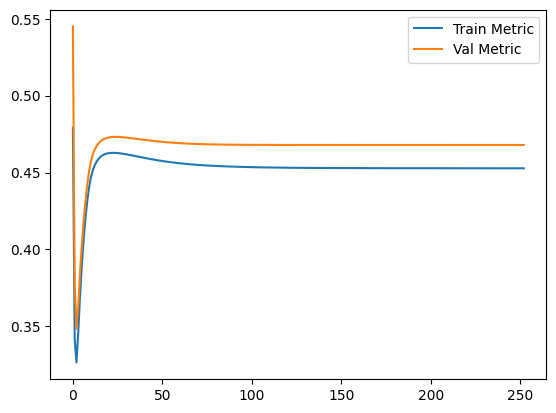

Fold 6 of 6 completed
Train Loss: 0.04141610678920163
Train Metric: 0.3264212511771431
Val Loss: 0.047412538954586914
Val Metric: 0.3483706330106135
Statistics: {'tr_loss': 0.0412889262494237, 'tr_metric': 0.32600911806463, 'val_loss': 0.041620035215609856, 'val_metric': 0.3272631137596131}




Combination: [32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 0.0001 ('Nesterov', 0.9) 0.01


Epochs:   3%|▎         | 257/10000 [00:08<05:30, 29.46it/s]


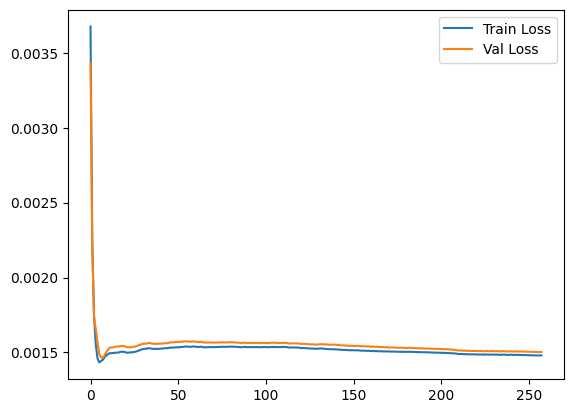

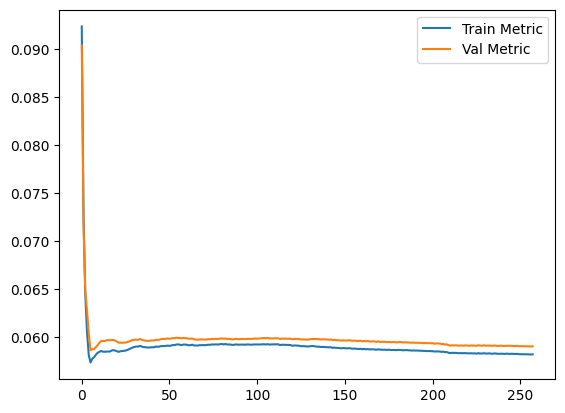

Fold 1 of 6 completed
Train Loss: 0.001450241249434587
Train Metric: 0.057863637398715036
Val Loss: 0.00146386354558952
Val Metric: 0.05871341847812168


Epochs:  28%|██▊       | 2814/10000 [01:35<04:04, 29.44it/s]


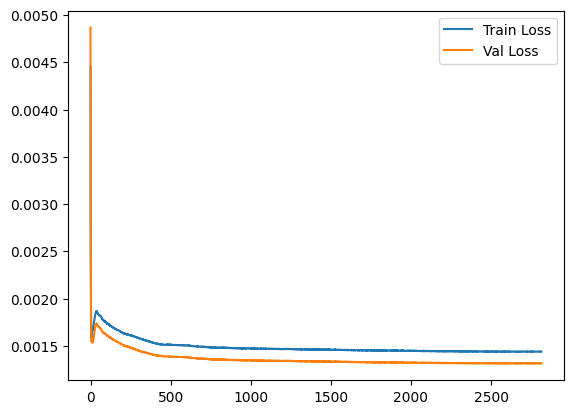

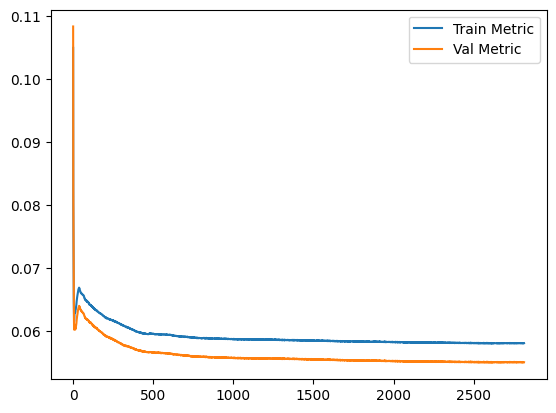

Fold 2 of 6 completed
Train Loss: 0.0014389664575326874
Train Metric: 0.05804348775317787
Val Loss: 0.0013151901327030072
Val Metric: 0.055019256102026605


Epochs:   3%|▎         | 259/10000 [00:08<05:30, 29.44it/s]


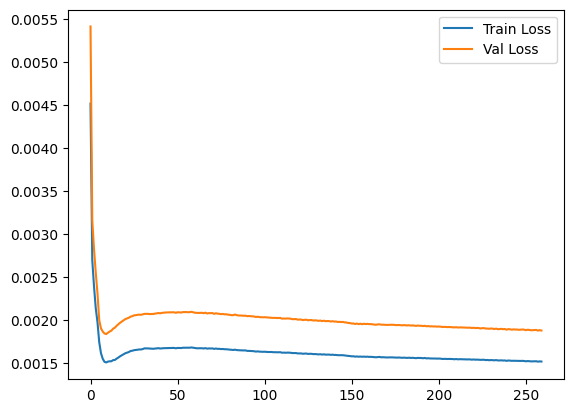

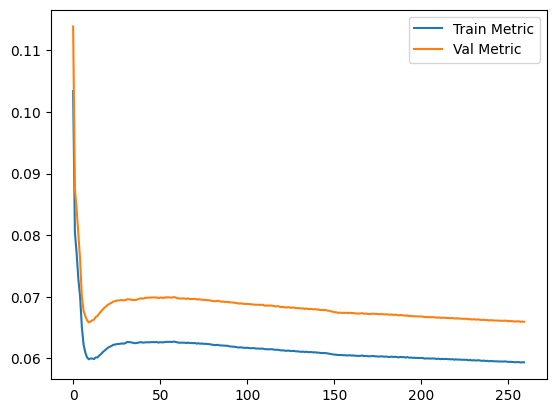

Fold 3 of 6 completed
Train Loss: 0.0015096910179453302
Train Metric: 0.05983348863883256
Val Loss: 0.0018398197043464001
Val Metric: 0.06579873369573139


Epochs:  61%|██████▏   | 6138/10000 [03:30<02:12, 29.16it/s]


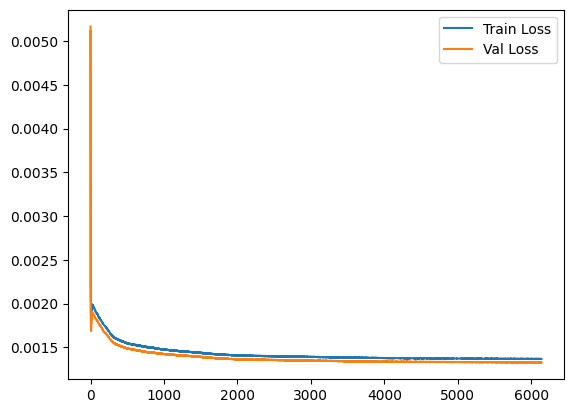

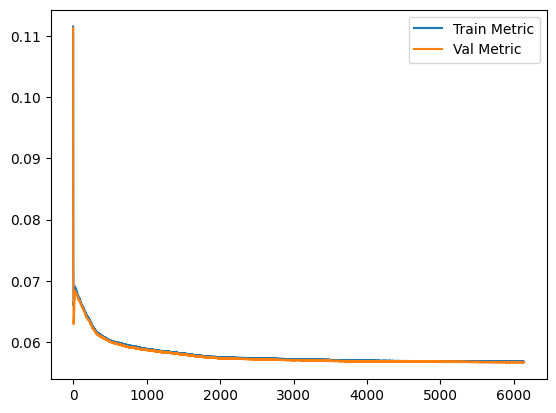

Fold 4 of 6 completed
Train Loss: 0.0013664090140776241
Train Metric: 0.05677254780772481
Val Loss: 0.001327275993290302
Val Metric: 0.056690481243388956


Epochs:  34%|███▍      | 3429/10000 [01:56<03:44, 29.31it/s]


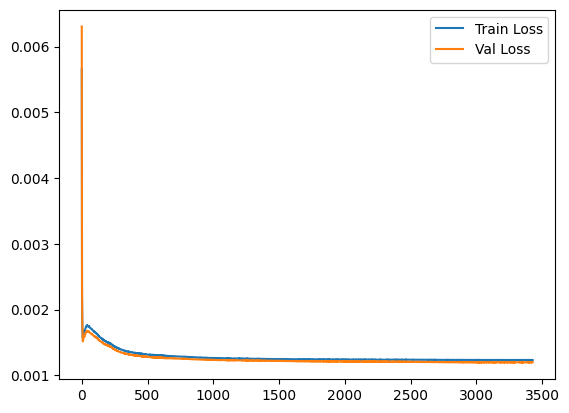

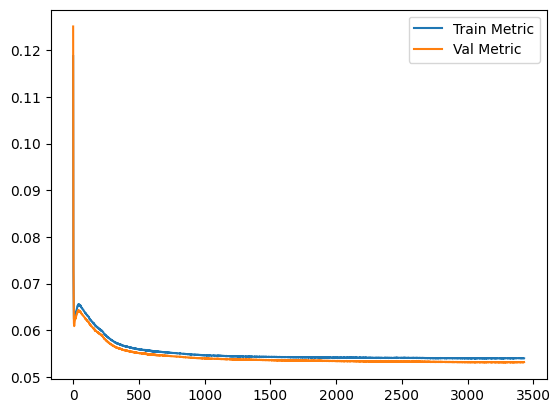

Fold 5 of 6 completed
Train Loss: 0.0012322512142876238
Train Metric: 0.05397376461842671
Val Loss: 0.0011968336709689727
Val Metric: 0.05311261324882117


Epochs:   3%|▎         | 253/10000 [00:08<05:35, 29.02it/s]


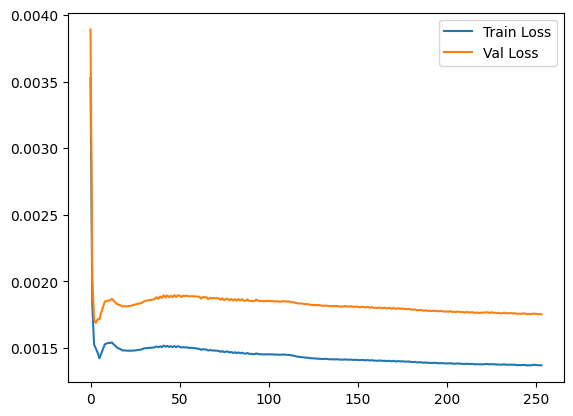

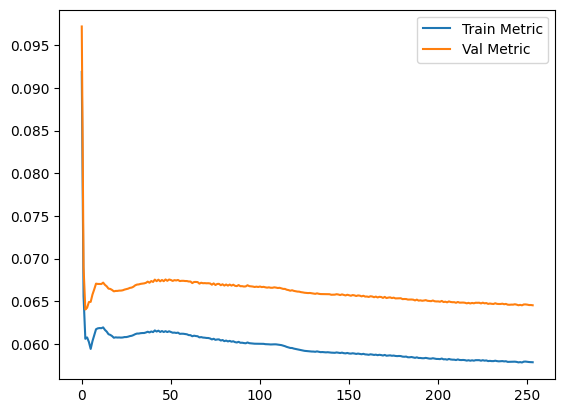

Fold 6 of 6 completed
Train Loss: 0.0014969228083221659
Train Metric: 0.06077045957167917
Val Loss: 0.00168836428514361
Val Metric: 0.06424819682872104
Statistics: {'tr_loss': 0.0014157469602666696, 'tr_metric': 0.057876230964759356, 'val_loss': 0.0014718912220069687, 'val_metric': 0.05893044993280181}




Combination: [32, 32, 3] ReLU Range_random (-0.5, 0.5) L2 0.0001 ('Nesterov', 0.9) 0.0001


Epochs:   3%|▎         | 252/10000 [00:08<05:31, 29.37it/s]


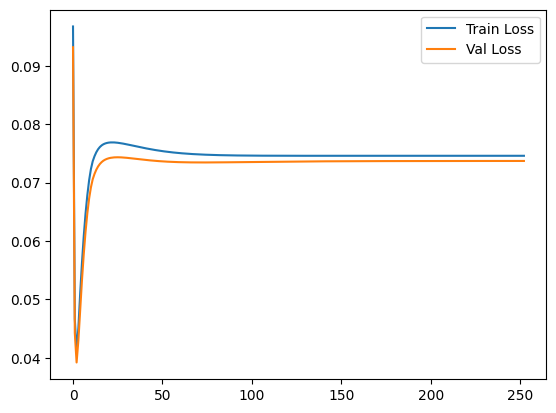

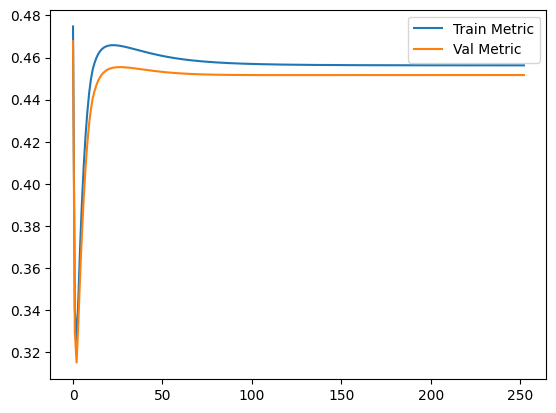

Fold 1 of 6 completed
Train Loss: 0.041050299770433944
Train Metric: 0.3252895406391655
Val Loss: 0.03919861910597349
Val Metric: 0.31507007170042867


Epochs:   3%|▎         | 252/10000 [00:08<05:32, 29.34it/s]


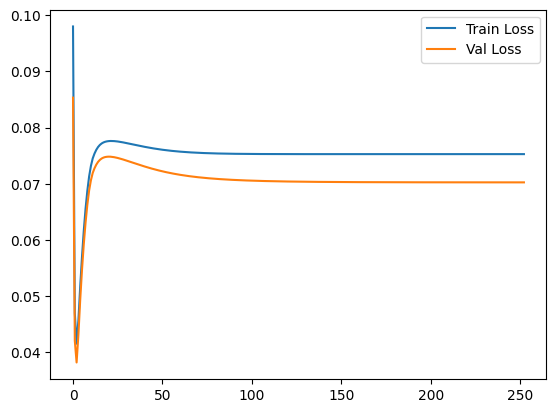

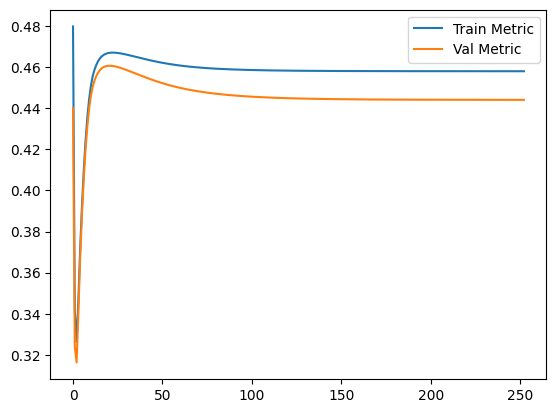

Fold 2 of 6 completed
Train Loss: 0.04148196233233799
Train Metric: 0.32638150217613326
Val Loss: 0.03813967242605735
Val Metric: 0.3163095939231795


Epochs:   3%|▎         | 252/10000 [00:08<05:32, 29.33it/s]


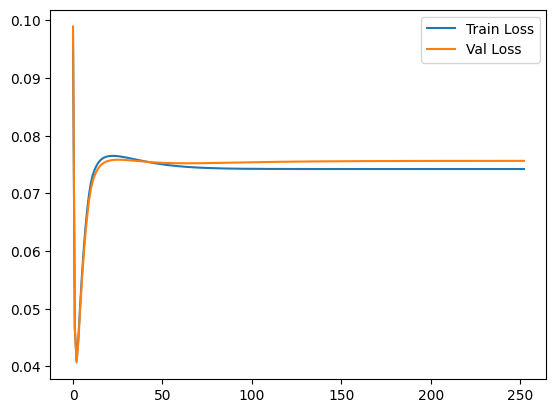

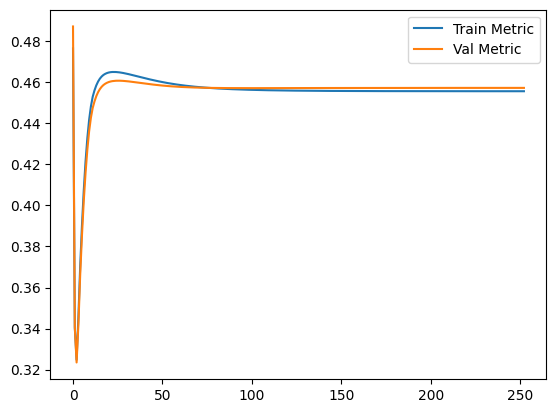

Fold 3 of 6 completed
Train Loss: 0.040969984511730964
Train Metric: 0.3248201425114449
Val Loss: 0.040666749014794994
Val Metric: 0.3235009836457081


Epochs:   3%|▎         | 252/10000 [00:08<05:32, 29.29it/s]


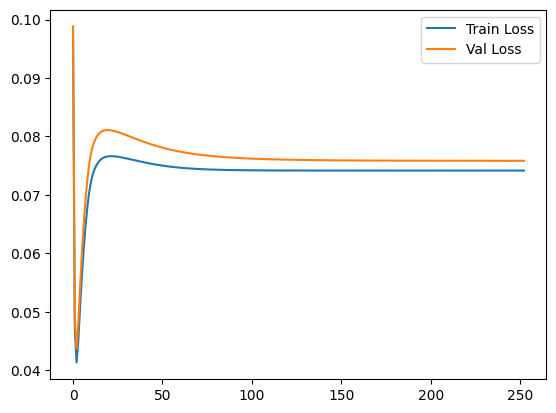

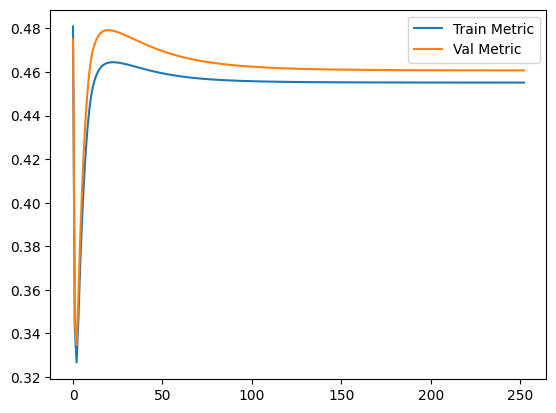

Fold 4 of 6 completed
Train Loss: 0.04134165251968717
Train Metric: 0.3266411543487343
Val Loss: 0.043703841234603316
Val Metric: 0.33462022244371986


Epochs:   3%|▎         | 252/10000 [00:08<05:34, 29.14it/s]


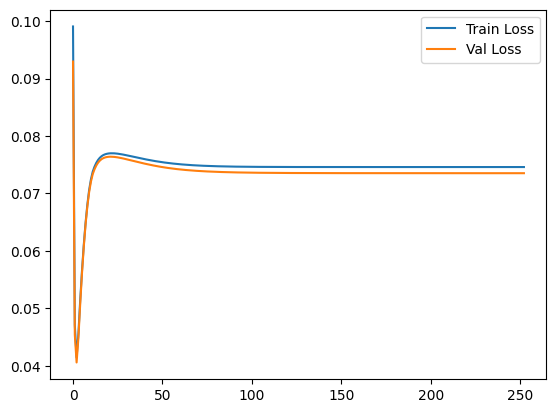

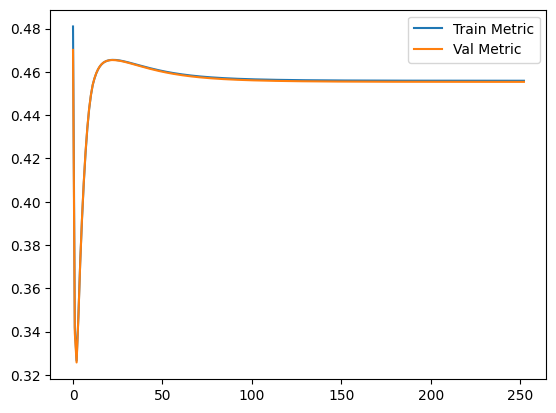

Fold 5 of 6 completed
Train Loss: 0.0414697256543453
Train Metric: 0.32649430926812956
Val Loss: 0.040594906542959074
Val Metric: 0.32569773546115166


Epochs:   3%|▎         | 252/10000 [00:08<05:32, 29.35it/s]


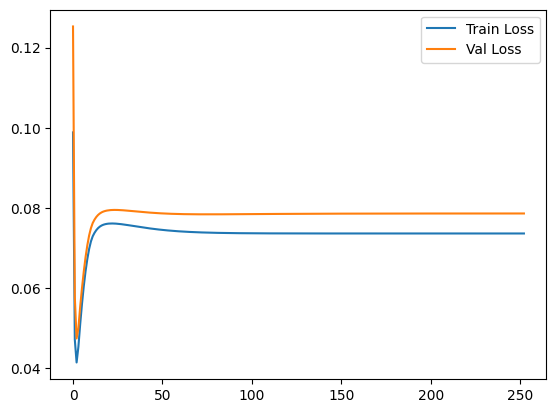

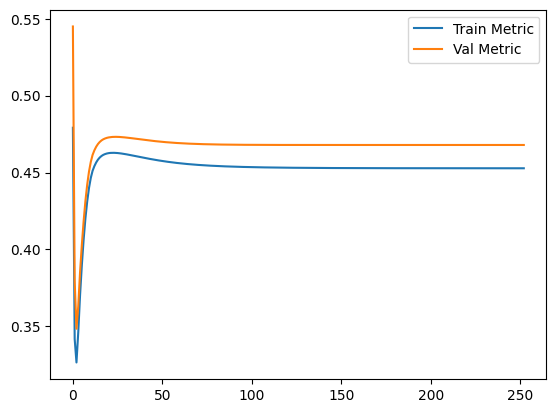

Fold 6 of 6 completed
Train Loss: 0.041414153204294646
Train Metric: 0.32641349595789637
Val Loss: 0.047410265518290425
Val Metric: 0.3483618289480502
Statistics: {'tr_loss': 0.041287962998805, 'tr_metric': 0.32600669081691735, 'val_loss': 0.04161900897377978, 'val_metric': 0.32726007268703966}




Combination: [64, 64, 3] ReLU Range_random (-0.5, 0.5) L2 1e-06 ('Standard', 0.9) 0.01


Epochs:  22%|██▏       | 2175/10000 [01:28<05:19, 24.49it/s]


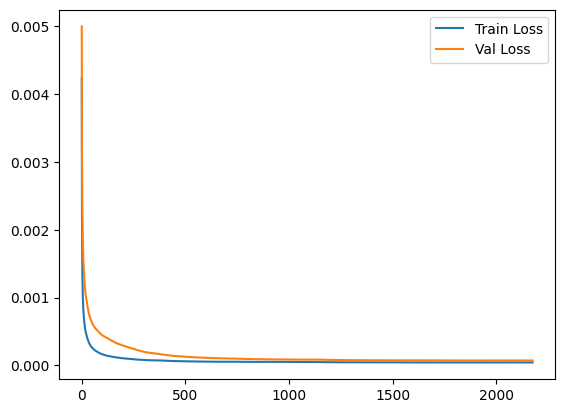

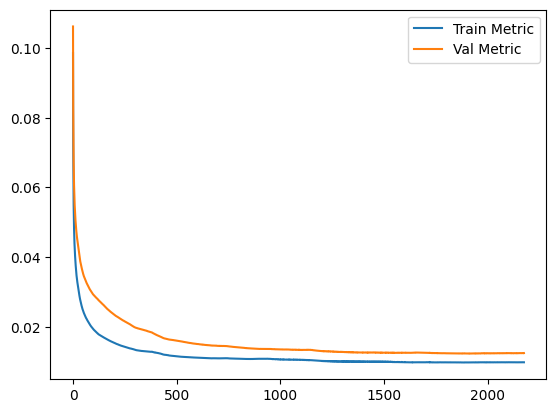

Fold 1 of 6 completed
Train Loss: 4.265481248923109e-05
Train Metric: 0.009753409239108309
Val Loss: 7.12868623501003e-05
Val Metric: 0.012313424156163051


Epochs:  26%|██▌       | 2554/10000 [01:44<05:04, 24.46it/s]


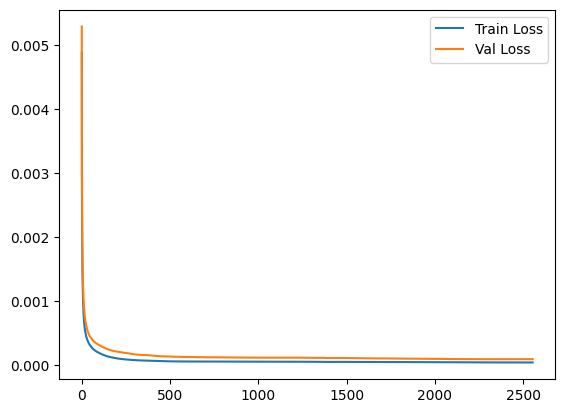

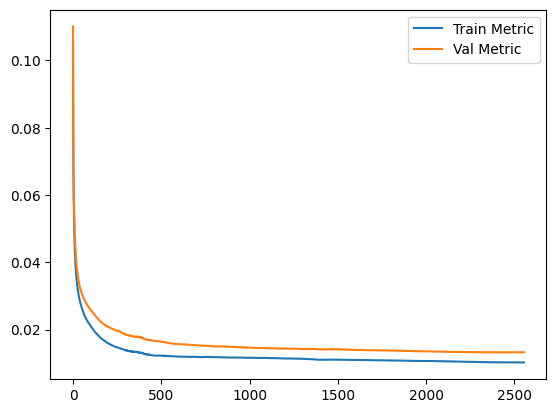

Fold 2 of 6 completed
Train Loss: 4.8137403762122555e-05
Train Metric: 0.010354541260666395
Val Loss: 9.8091020780933e-05
Val Metric: 0.013271216387324999


Epochs:  18%|█▊        | 1793/10000 [01:13<05:37, 24.29it/s]


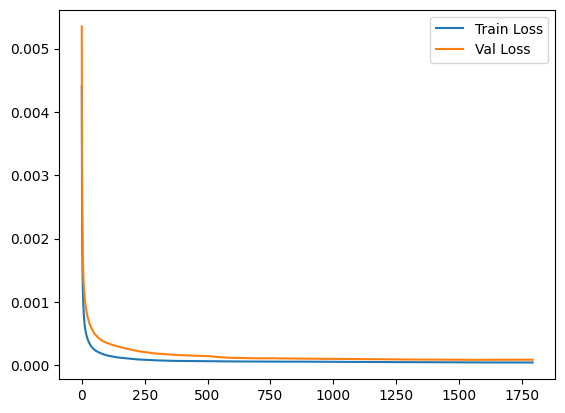

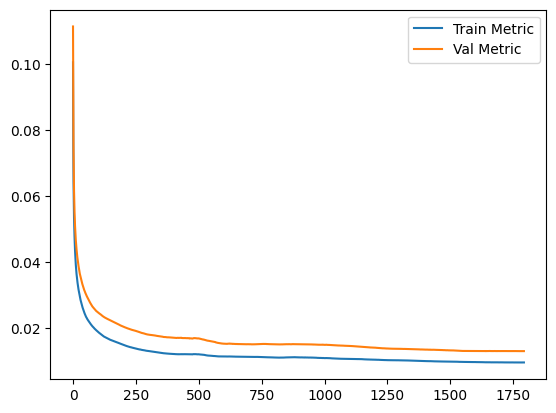

Fold 3 of 6 completed
Train Loss: 4.392189678376012e-05
Train Metric: 0.009886279043493432
Val Loss: 8.393864355692304e-05
Val Metric: 0.013205181197023975


Epochs:  34%|███▍      | 3434/10000 [02:21<04:30, 24.24it/s]


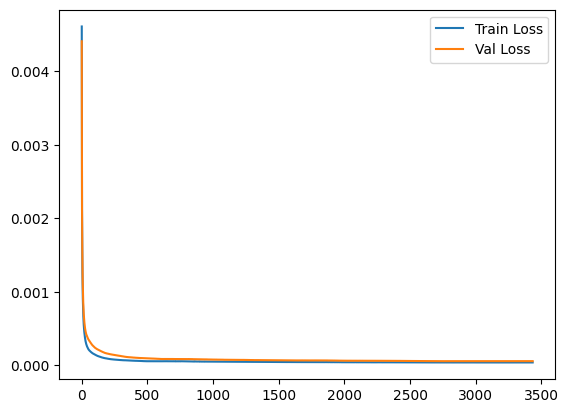

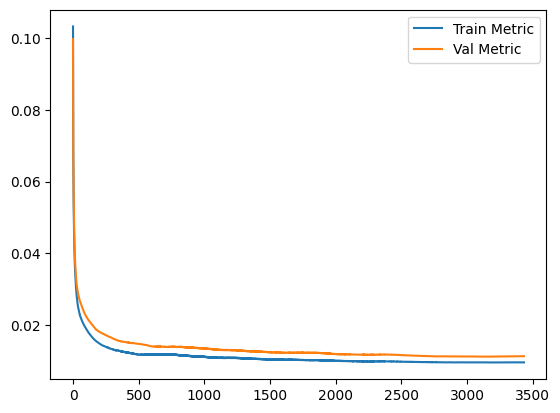

Fold 4 of 6 completed
Train Loss: 4.099374619185873e-05
Train Metric: 0.009567775070102617
Val Loss: 5.787415449432415e-05
Val Metric: 0.01119064020854794


Epochs:   0%|          | 0/10000 [00:00<?, ?it/s]/Users/lavo/Desktop/Projects/ML-project/notebooks/../layer.py:69: RuntimeWarning: invalid value encountered in multiply
  delta = curr_delta * self.activation.derivative(self.net)
Epochs:   2%|▏         | 249/10000 [00:10<06:43, 24.18it/s]


IndexError: list index out of range

In [4]:
hyperparameters = {
    'layers_sizes': [[32,32,3], [64, 64, 3]],
    'activations': ["ReLU"], 
    'startings': ["Range_random"],
    'startings_range': [(-0.5, 0.5)],
    'regularizers': ["L2"],
    'regularizers_lambda': [1e-6, 1e-4],
    'momentums': [('Standard', 0.9), ('Nesterov', 0.9)],
    'etas': [1e-2, 1e-4],
}

data_to_csv = grid_search(
    hyperparams=hyperparameters,
    X=X_train,
    y=y_train,
    k=6,
    metric=MEE(),
    loss=MSE(1),
    seed=6,
    verbose=True
)



In [33]:
X_train, y_train, test = read_cup("../data/ML-CUP23-TR.csv", "../data/ML-CUP23-TS.csv")

In [34]:
# reshape ytrain eliminating last shape
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])
y_train.shape

(1000, 3)

In [35]:
# reshape Xtrain eliminating last shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_train.shape

(1000, 10)

Iteration 1, loss = 26.33156119
Iteration 2, loss = 4.88784124
Iteration 3, loss = 3.39046937
Iteration 4, loss = 3.03199760
Iteration 5, loss = 2.89813620
Iteration 6, loss = 2.14590019
Iteration 7, loss = 1.91985154
Iteration 8, loss = 2.00108090
Iteration 9, loss = 1.91057123
Iteration 10, loss = 1.70192808
Iteration 11, loss = 1.68032179
Iteration 12, loss = 1.51728086
Iteration 13, loss = 1.44412569
Iteration 14, loss = 1.29010972
Iteration 15, loss = 1.22219213
Iteration 16, loss = 1.30595695
Iteration 17, loss = 1.09756845
Iteration 18, loss = 1.17505914
Iteration 19, loss = 1.15412841
Iteration 20, loss = 1.03937829
Iteration 21, loss = 1.06510156
Iteration 22, loss = 0.95882854
Iteration 23, loss = 0.95093070
Iteration 24, loss = 0.91984235
Iteration 25, loss = 0.91390295
Iteration 26, loss = 0.95696661
Iteration 27, loss = 0.92146096
Iteration 28, loss = 0.88472923
Iteration 29, loss = 0.97950681
Iteration 30, loss = 0.82000229
Iteration 31, loss = 0.75154191
Iteration 32, lo

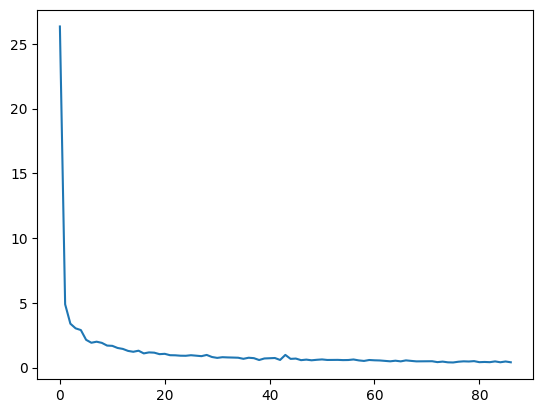

1.3815081419727102


In [39]:
# use scikit-lear to make regression in 3d
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(32,32),
    activation='relu',
    solver='sgd',
    alpha=0,
    batch_size=1,
    learning_rate_init=1e-3,
    max_iter=2500,
    shuffle=True,
    random_state=6,
    verbose=True,
    momentum=0,
    beta_1= 0,
    beta_2= 0.,
    epsilon= 1,
    validation_fraction = 0,
    nesterovs_momentum=False
)

mlp.fit(X_train, y_train)
# print the learning curve
plt.plot(mlp.loss_curve_)
plt.show()

# print the mean error
print(MEE()(y_train, mlp.predict(X_train)))

In [ ]:
import itertools

# Define the hyperparameters as dictionaries
hyperparameters = {
    'losses': ["MSE"],
    'layers_sizes': [[32,32,3],[16,16,16,3]],
    'activations': ["ReLU"], 
    'startings': ["Range_random"],
    'startings_range': [(-0.5, 0.5)],
    'regularizers': ["L2"],
    'regularizers_lambda': [1e-6, 1e-8],
    'momentums': [('Nesterov', 1e-4), ('Standard', 1e-4)],
    'etas': [1e-4]
}

# Create a list of all the possible combinations using itertools.product
hyperparameter_combinations = list(itertools.product(*hyperparameters.values()))

all_dics = []
# Print the result or use it as needed
for combination in hyperparameter_combinations:
    hyperparameter_dict = dict(zip(hyperparameters.keys(), combination))
    print(hyperparameter_dict)
    all_dics.append(hyperparameter_dict)

In [ ]:
for i in all_dics:
    print(*i.values())

In [ ]:
losses_ = "MSE"

startings_ = []
startings_range_ = []
activations_ = []
regularizers_ = []
regularizers_lambda_ = []
momentums_ = []


for combination in all_dics:
    layers_sizes_ = combination['layers_sizes']
    startings_ = []
    activations_ = []
    regularizers_ = []
    regularizers_lambda_ = []
    momentums_ = []
    startings_range_ = []
    etas_ = combination['etas']
    for i in range(len(combination['layers_sizes'])):
        activations_.append(combination['activations'] if i != len(layers_sizes_)-1 else "Identity")
        startings_.append(combination['startings'])
        startings_range_.append(combination['startings_range'])
        regularizers_.append(combination['regularizers'])
        regularizers_lambda_.append(combination['regularizers_lambda'])
        momentums_.append(combination['momentums'])
    
    print(layers_sizes_)
    print(activations_)
    print(startings_)
    print(startings_range_)
    print(regularizers_)
    print(regularizers_lambda_)
    print(momentums_)
    print(etas_)
    print("\n")

In [ ]:
data_to_csv = [["Loss func","Size", "Activation", "Starting", "Range", "Regularizer", "lambda", "Momentum", "Eta", "tLoss", "tMetric", "vLoss", "vMetric"]]

In [ ]:
seed = 3
data_to_csv = [[]]
losses_ = "MSE"

for combination in all_dics:
    layers_sizes_ = combination['layers_sizes']
    activations_ = []
    startings_ = []
    startings_range_ = []
    regularizers_ = []
    regularizers_lambda_ = []
    momentums_ = []
    etas_ = combination['etas']
    for i in range(len(combination['layers_sizes'])):
        activations_.append(combination['activations'] if i != len(layers_sizes_)-1 else "Identity")
        startings_.append(combination['startings'])
        startings_range_.append(combination['startings_range'])
        regularizers_.append(combination['regularizers'])
        regularizers_lambda_.append(combination['regularizers_lambda'])
        momentums_.append(combination['momentums'])
    net = create_all_net(
        seed=seed,
        loss="MSE",
        batch_size=1,
        input_size=len(X_train[0]),
        num_layer=len(layers_sizes_),
        layers_size=layers_sizes_,
        activations=activations_,
        starting=startings_,
        starting_range=startings_range_,
        regularizers=regularizers_,
        regularizers_lambda=regularizers_lambda_,
        momentums=momentums_,
        eta=etas_
        )
    statistics = kfold_crossval(
        X=X_train,
        y=y_train,
        k=6,
        net=net,
        epochs=10000,
        patience=250,
        seed=seed,
        metric=MEE(),
        comb=combination
        )
    print(statistics)
    print("\n\n\n")
    data_to_csv.append(list(combination.values()) + list(statistics.values()))


In [8]:
data_to_csv

NameError: name 'data_to_csv' is not defined

In [5]:
import csv

csv_file_path = '../statistics/test.csv'
with open(csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    # Write the data to the CSV file
    for row in data_to_csv:
        writer.writerow(row)    

NameError: name 'data_to_csv' is not defined